In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

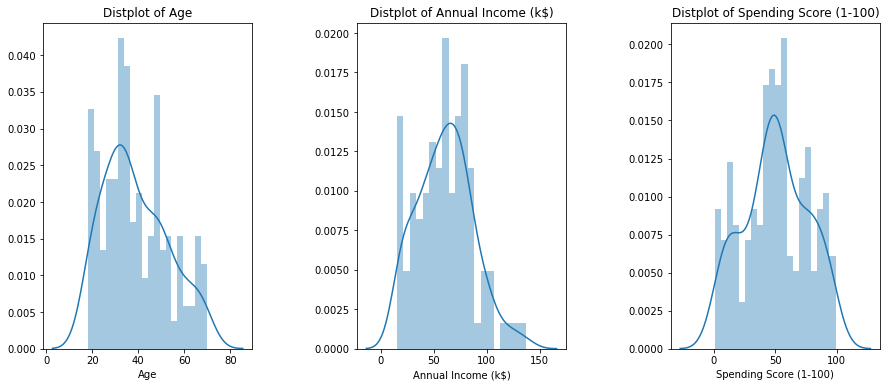

In [6]:
plt.figure(1, figsize = (15,6))

n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
    
plt.show()    

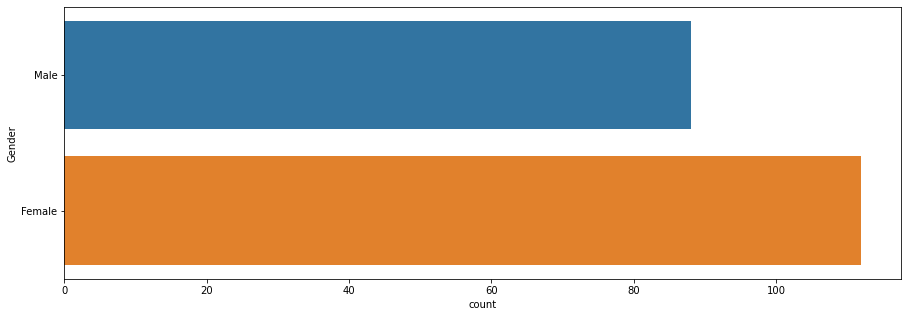

In [7]:
plt.figure(figsize = (15,5))
sns.countplot(y='Gender', data=df)
plt.show()

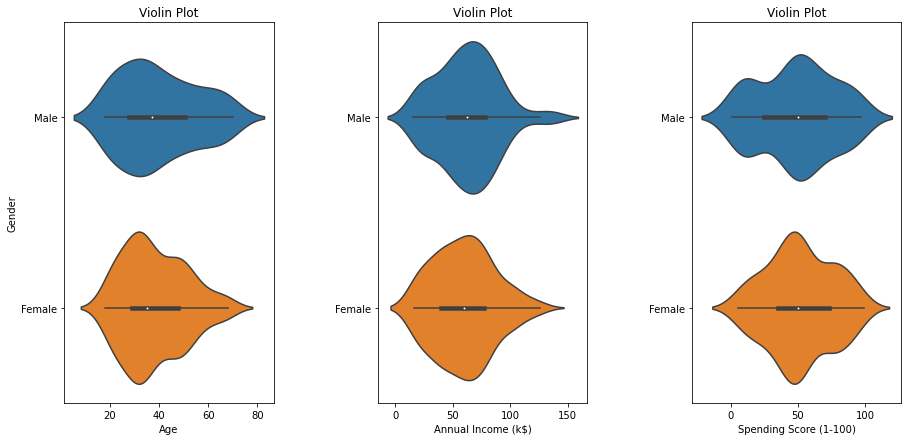

In [9]:
plt.figure(1, figsize = (15,7))

n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(df[x], y = df['Gender'])
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
    
plt.show()    

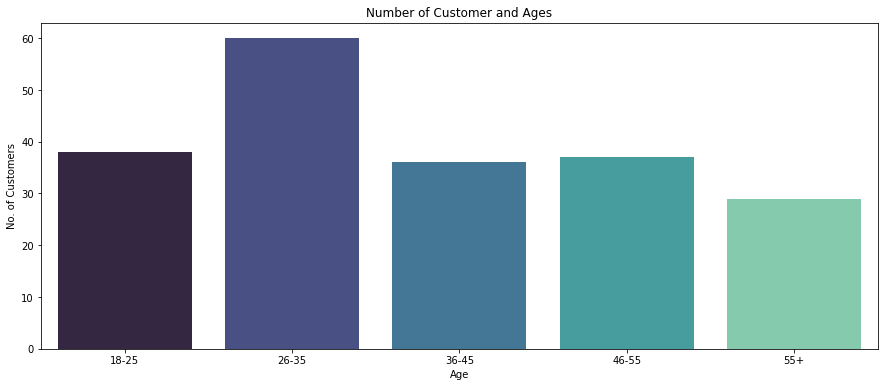

In [10]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <=25)] 
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <=35)] 
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <=45)] 
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <=55)] 
age_55above = df.Age[(df.Age >= 56) ] 

agex = ['18-25','26-35','36-45','46-55','55+']
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette='mako')
plt.title('Number of Customer and Ages')
plt.xlabel('Age')
plt.ylabel('No. of Customers')
plt.show()


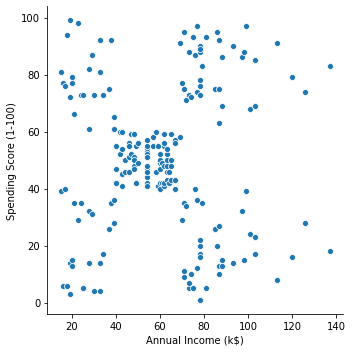

In [11]:
sns.relplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data = df)

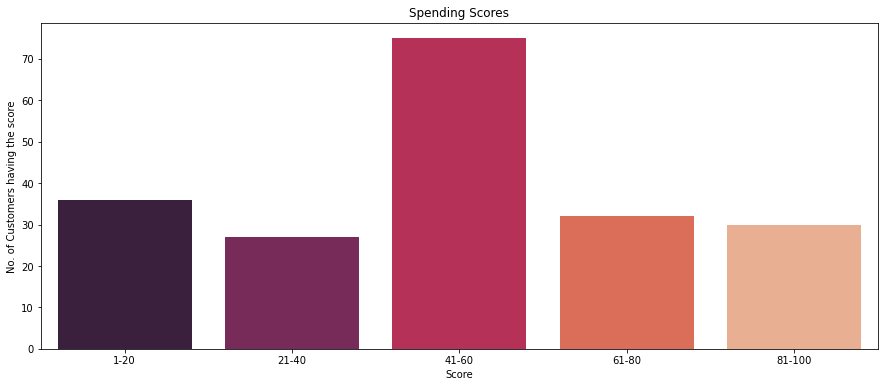

In [12]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=1) & (df['Spending Score (1-100)'] <=20)]
ss_21_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=21) & (df['Spending Score (1-100)'] <=40)]
ss_41_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=41) & (df['Spending Score (1-100)'] <=60)]
ss_61_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=61) & (df['Spending Score (1-100)'] <=80)]
ss_81_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=81) & (df['Spending Score (1-100)'] <=100)]


agex = ['1-20','21-40','41-60','61-80','81-100']
agey = [len(ss_1_20.values), len(ss_21_20.values), len(ss_41_20.values), len(ss_61_20.values), len(ss_81_20.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette='rocket')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('No. of Customers having the score')
plt.show()


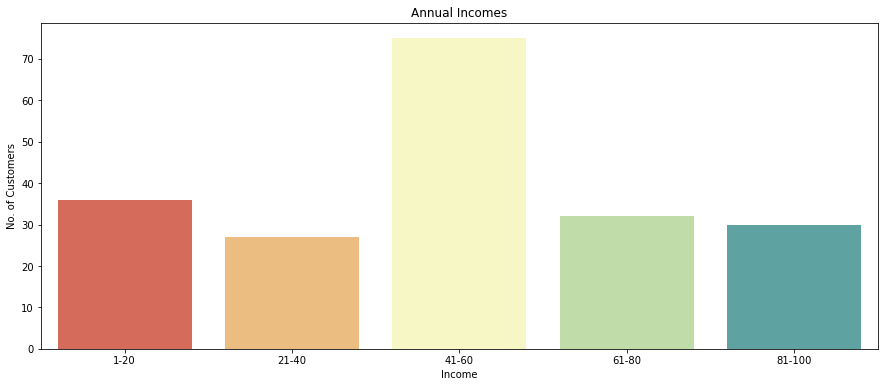

In [13]:
ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=0) & (df['Annual Income (k$)'] <=30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=31) & (df['Annual Income (k$)'] <=60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=61) & (df['Annual Income (k$)'] <=90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=91) & (df['Annual Income (k$)'] <=120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=121) & (df['Annual Income (k$)'] <=150)]


aix = ['0-30','31-60','61-90','91-120','121-150']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette='Spectral')
plt.title('Annual Incomes')
plt.xlabel('Income')
plt.ylabel('No. of Customers')
plt.show()


## Type 1 Model - Annual Income, Spending Score

In [14]:
# Capturing the 2 columns alone.. 
# iloc gives a np.array type not dataframe

# X = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
# wcss - within clusters sum of squares from centroid. Plot this
# As no. of clusters increase wcss start to decrease. 
# At the breakeven we get a elbow shaped. flat line after that. all wcss scores remain same.
# wcss largest when k = 1 

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


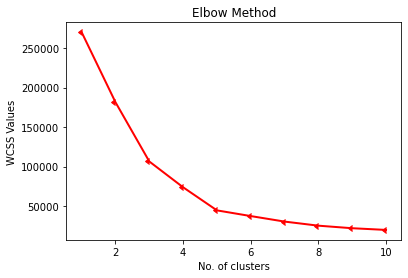

In [16]:
plt.plot(range(1,11), wcss, linewidth=2, marker=8, color = "red")
plt.title('Elbow Method')

plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')

plt.show()

In [17]:
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 5)

In [18]:
y_kmeans = kmeansmodel.fit_predict(X)

In [19]:
type(y_kmeans)

numpy.ndarray

In [20]:
y_kmeans.shape

(200,)

In [21]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [22]:
print(kmeans.cluster_centers_)

[[ 62.58333333  47.29166667]
 [109.7         82.        ]
 [ 28.18181818  33.27272727]
 [109.7         22.        ]
 [ 25.0952381   80.04761905]
 [ 79.26666667  90.46666667]
 [ 24.58333333   9.58333333]
 [ 79.73913043  13.39130435]
 [ 77.78571429  73.28571429]
 [ 46.38888889  52.13888889]]


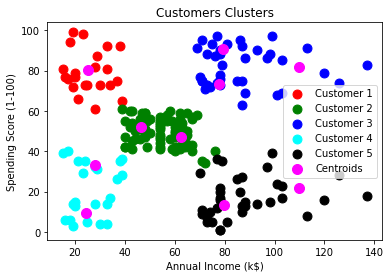

In [23]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c = 'red', label = 'Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c = 'green', label = 'Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c = 'blue', label = 'Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c = 'cyan', label = 'Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, c = 'black', label = 'Customer 5')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'magenta', label = 'Centroids')

plt.title('Customers Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

# Type 2 Clustering based on Annual Income and Spending Score

C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


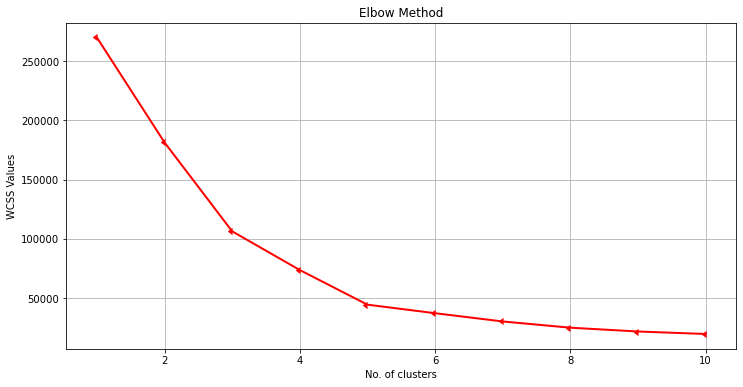

In [26]:
X2 = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, marker=8, color = "red")
plt.title('Elbow Method')

plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')

plt.show()

In [27]:
kmeans2 = KMeans(n_clusters = 5)

label = kmeans2.fit_predict(X2)

print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [28]:
print(kmeans2.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


No handles with labels found to put in legend.


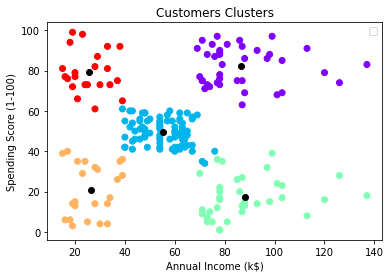

In [29]:
plt.scatter(X2[:,0], X2[:,1], c = kmeans2.labels_, cmap = 'rainbow')
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c = 'black')

plt.title('Customers Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

# Type 2 Model - Clustering based on all 3 numeric elements

In [31]:
OMP_NUM_THREADS=1

C:\Users\sande\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


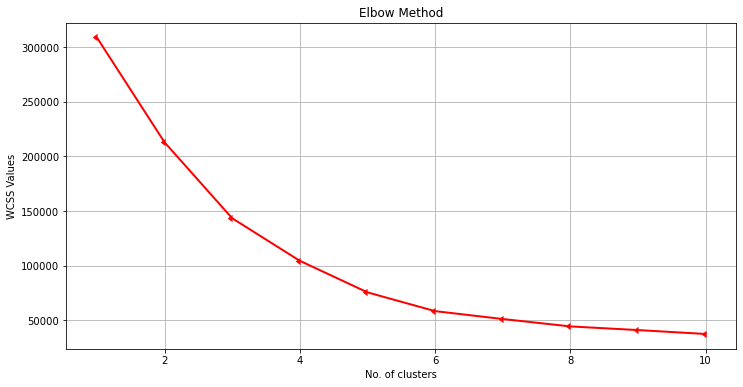

In [32]:
X3 = df.iloc[:,2:].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, marker=8, color = "red")
plt.title('Elbow Method')

plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')

plt.show()

In [33]:
kmeans3 = KMeans(n_clusters = 5)

label = kmeans3.fit_predict(X3)

print(label)

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 4 0 3 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 3 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [34]:
print(kmeans3.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]]


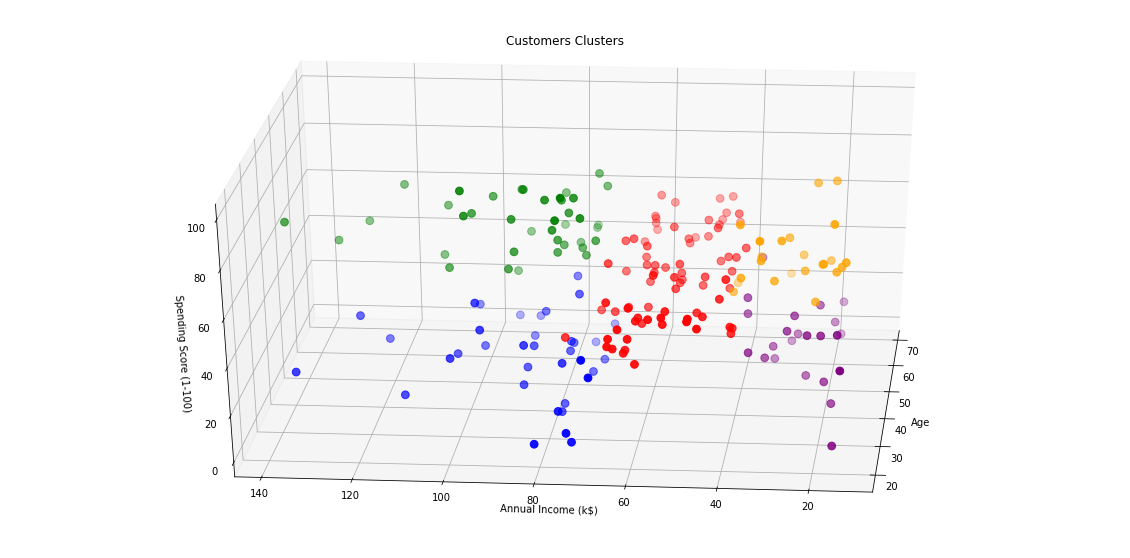

In [35]:
clusters = kmeans3.fit_predict(X3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df.Age[df.label ==0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label ==0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label ==1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label ==1], c = 'red', s = 60)
ax.scatter(df.Age[df.label ==2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label ==2], c = 'green', s = 60)
ax.scatter(df.Age[df.label ==3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label ==3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label ==4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label ==4], c = 'purple', s = 60)

ax.view_init(30,185)

plt.title('Customers Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')


plt.show()